In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random

In [8]:
time = 300
delta_t = 0.01

din_b = 0
din_a = 12
din_tau_w = 30
din_cm = 200

cm = 200
g_L = 10
E_L = -70
E_ex = 0
E_inh = -70
tau_ex = 6
delta_g_ex = 12.5 #1.25 #0.01
g_ex = 0
delta_g_inh = 30 #3 #0.01
g_inh = 0
tau_inh = 3
V_T = -50
V_thr = 0
V_reset = -58
mn_b = 60
mn_a = 0
mn_tau_w = 30

slope_f = 2
n_mns = 2
n_ains = 2
n_cins = 2
n_dins = 2
g_gj = 0.2

# Voltage vector: size = number of MNs x 1; stored voltage matrix: size = number of recorded neurons x number of time steps. 
n_record = 2
n_timesteps = len(np.arange(0,time,delta_t))
mn_voltage_vec = np.zeros((n_mns,1))
mn_voltage_vec[:,:] += E_L
mn_voltage_record = np.zeros((n_record,n_timesteps))
# aINs
ain_voltage_vec = np.zeros((n_ains,1))
ain_voltage_vec[:,:] += E_L
ain_voltage_record = np.zeros((n_record,n_timesteps))
# cINs
cin_voltage_vec = np.zeros((n_cins,1))
cin_voltage_vec[:,:] += E_L
cin_voltage_record = np.zeros((n_record,n_timesteps))
# dINs
din_voltage_vec = np.zeros((n_dins,1))
din_voltage_vec[:,:] += E_L
din_voltage_record = np.zeros((n_record,n_timesteps))
din_current_record = np.zeros((n_record,n_timesteps))

# Spike times list of lists: number of lists = number of MNs. 
mn_spike_times = [[] for m in range(n_mns)]
ain_spike_times = [[] for m in range(n_ains)]
cin_spike_times = [[] for m in range(n_cins)]
din_spike_times = [[] for m in range(n_dins)]

# dIN gap junctions
gap_junctions = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if abs(r-c) < 4 and r != c:
                gap_junctions[r,c] += 1
                
# MN -> MN synapses.
mn_synapses = np.zeros((n_mns,n_mns))
for r in range(n_mns):
    for c in range(n_mns):
        if r < n_mns/2 and c < n_mns/2 or r >= n_mns/2 and c >= n_mns/2:
            if random.random() < 0.05 and r != c:
                mn_synapses[r,c] += 1
                
# MN -> dIN synapses.
mn_din_synapses = np.zeros((n_mns,n_dins))
for r in range(n_mns):
    for c in range(n_dins):
        if r < n_mns/2 and c < n_dins/2 or r >= n_mns/2 and c >= n_dins/2:
            if random.random() < 0.05 and r != c:
                mn_din_synapses[r,c] += 1
                
# MN -> aIN synapses.
mn_ain_synapses = np.zeros((n_mns,n_ains))
for r in range(n_mns):
    for c in range(n_ains):
        if r < n_mns/2 and c < n_ains/2 or r >= n_mns/2 and c >= n_ains/2:
            if random.random() < 0.05 and r != c:
                mn_ain_synapses[r,c] += 1
                
# MN -> cIN synapses.
mn_cin_synapses = np.zeros((n_mns,n_cins))
for r in range(n_mns):
    for c in range(n_cins):
        if r < n_mns/2 and c < n_cins/2 or r >= n_mns/2 and c >= n_cins/2:
            if random.random() < 0.05 and r != c:
                mn_cin_synapses[r,c] += 1   
                
# aIN -> MN synapses.
ain_mn_synapses = np.zeros((n_ains,n_mns))
for r in range(n_ains):
    for c in range(n_mns):
        if r < n_ains/2 and c < n_mns/2 or r >= n_ains/2 and c >= n_mns/2:
            if random.random() < 0.1:
                ain_mn_synapses[r,c] += 1
            
# aIN -> aIN synapses.
ain_synapses = np.zeros((n_ains,n_ains))
for r in range(n_ains):
    for c in range(n_ains):
        if r < n_ains/2 and c < n_ains/2 or r >= n_ains/2 and c >= n_ains/2:
            if random.random() < 0.1 and r != c:
                ain_synapses[r,c] += 1
                
# aIN -> cIN synapses.
ain_cin_synapses = np.zeros((n_ains,n_cins))
for r in range(n_ains):
    for c in range(n_cins):
        if r < n_ains/2 and c < n_cins/2 or r >= n_ains/2 and c >= n_cins/2:
            if random.random() < 0.1:
                ain_cin_synapses[r,c] += 1
                
# aIN -> dIN synapses.
ain_din_synapses = np.zeros((n_ains,n_dins))
for r in range(n_ains):
    for c in range(n_dins):
        if r < n_ains/2 and c < n_dins/2 or r >= n_ains/2 and c >= n_dins/2:
            if random.random() < 0.1:
                ain_din_synapses[r,c] += 1
            
# cIN -> aIN synapses.
cin_ain_synapses = np.zeros((n_cins,n_ains))
for r in range(n_cins):
    for c in range(n_ains):
        if r < n_cins/2 and c >= n_ains/2 or r >= n_cins/2 and c < n_ains/2:
            if random.random() < 0.1:
                cin_ain_synapses[r,c] += 1
            
# cIN -> MN synapses.
cin_mn_synapses = np.zeros((n_cins,n_mns))
for r in range(n_cins):
    for c in range(n_mns):
        if r < n_cins/2 and c >= n_mns/2 or r >= n_cins/2 and c < n_mns/2:
            if random.random() < 0.1:
                cin_mn_synapses[r,c] += 1
            
# cIN -> cIN synapses.
cin_synapses = np.zeros((n_cins,n_cins))
for r in range(n_cins):
    for c in range(n_cins):
        if r < n_cins/2 and c >= n_cins/2 or r >= n_cins/2 and c < n_cins/2:
            if random.random() < 0.1:
                cin_synapses[r,c] += 1
                
# cIN -> dIN synapses.
cin_din_synapses = np.zeros((n_cins,n_dins))
for r in range(n_cins):
    for c in range(n_dins):
        if r < n_cins/2 and c >= n_dins/2 or r >= n_cins/2 and c < n_dins/2:
            if random.random() < 0.1:
                cin_din_synapses[r,c] += 1
                
# dIN -> dIN synapses.
din_synapses = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if random.random() < 0.1 and r != c:
                din_synapses[r,c] += 1   
                
# dIN -> MN synapses.
din_mn_synapses = np.zeros((n_dins,n_mns))
for r in range(n_dins):
    for c in range(n_mns):
        if r < n_dins/2 and c < n_mns/2 or r >= n_dins/2 and c >= n_mns/2:
            if random.random() < 0.1:
                din_mn_synapses[r,c] += 1
                
# dIN -> aIN synapses.
din_ain_synapses = np.zeros((n_dins,n_ains))
for r in range(n_dins):
    for c in range(n_ains):
        if r < n_dins/2 and c < n_ains/2 or r >= n_dins/2 and c >= n_ains/2:
            if random.random() < 0.1:
                din_ain_synapses[r,c] += 1
                
# dIN -> cIN synapses.
din_cin_synapses = np.zeros((n_dins,n_cins))
for r in range(n_dins):
    for c in range(n_cins):
        if r < n_dins/2 and c < n_cins/2 or r >= n_dins/2 and c >= n_cins/2:
            if random.random() < 0.1:
                din_cin_synapses[r,c] += 1
                
mn_g_ex = np.zeros((n_mns,1))
mn_g_inh = np.zeros((n_mns,1))
mn_w = np.zeros((n_mns,1))
ain_g_ex = np.zeros((n_ains,1))
ain_g_inh = np.zeros((n_ains,1))
ain_w = np.zeros((n_ains,1))
cin_g_ex = np.zeros((n_cins,1))
cin_g_inh = np.zeros((n_cins,1))
cin_w = np.zeros((n_cins,1))
din_g_ex = np.zeros((n_dins,1))
din_g_inh = np.zeros((n_dins,1))
din_w = np.zeros((n_dins,1))
din_ws = []

/tmp/ipykernel_24651/3691473065.py:95: RuntimeWarning: overflow encountered in exp
  din_current_record[1,idx] += - g_L*(din_voltage_vec[int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2),-1] - V_T)/slope_f) \


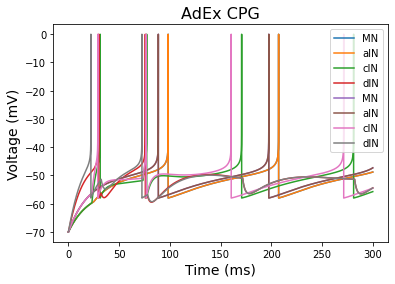

In [9]:

for idx,t in enumerate(np.arange(0,time,delta_t)):
    if t > 25:
        I_L = 200
        I_R = 200
        I_L_din = 400
        I_R_din = 400
    else:
        I_L = 150
        I_R = 200
        I_L_din = 350
        I_R_din = 400
    i_gj = np.zeros((1,n_dins))
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_reset
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_reset
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_reset
    for din in range(n_dins):
        if din_voltage_vec[din,-1] >= V_thr:
            din_voltage_vec[din,-1] = V_reset
    # dIN gap junctions
#     for row in range(n_dins):
#         for c in range(n_dins):
#             i_gj[:,row] += gap_junctions[row,c]*(din_voltage_vec[row,-1] - din_voltage_vec[c,-1])*g_gj
#     i_gj = i_gj.reshape(n_dins,1)
    i_gj = np.zeros((n_dins,1))
    # AMPA synapses from MNs to CPG
    for mn in range(n_mns):
        spikes = mn_spike_times[mn]
        for spike in spikes:
            if spike + 1 == t:
                mn_g_ex += mn_synapses[mn,-1]*delta_g_ex
#                 din_g_ex += mn_din_synapses[mn, -1]*delta_g_ex*6
#                 ain_g_ex += mn_ain_synapses[mn, -1]*delta_g_ex*6
#                 cin_g_ex += mn_cin_synapses[mn, -1]*delta_g_ex*6
    # dIN -> MN/aIN/cIN/dIN excitatory synapses
    for din in range(n_dins):
        spikes = din_spike_times[din]
        for spike in spikes:
            if spike + 1 == t:
                din_g_ex += din_synapses[din,-1]*delta_g_ex
                mn_g_ex += din_mn_synapses[din,-1]*delta_g_ex
                ain_g_ex += din_ain_synapses[din,-1]*delta_g_ex
                cin_g_ex += din_cin_synapses[din,-1]*delta_g_ex
    # aIN -> MN/aIN/cIN/dIN inhibitory synapses
    for ain in range(n_ains):
        spikes = ain_spike_times[ain]
        for spike in spikes:
            if spike + 1 == t:
                mn_g_inh += ain_mn_synapses[ain,-1]*delta_g_inh
                ain_g_inh += ain_synapses[ain,-1]*delta_g_inh
                cin_g_inh += ain_cin_synapses[ain,-1]*delta_g_inh
                din_g_inh += ain_din_synapses[ain,-1]*delta_g_inh
    # cIN -> aIN/MN/dIN/cIN synapses
    for cin in range(n_cins):
        spikes = cin_spike_times[cin]
        for spike in spikes:
            if spike + 1 == t:
                mn_g_inh += cin_mn_synapses[cin,-1]*delta_g_inh
                ain_g_inh += cin_ain_synapses[cin,-1]*delta_g_inh
                cin_g_inh += cin_synapses[cin,-1]*delta_g_inh
                din_g_inh += cin_din_synapses[cin,-1]*delta_g_inh 
    mn_voltage_vec[:int(n_mns/2),-1] += delta_t*((-g_L*(mn_voltage_vec[:int(n_mns/2),-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[:int(n_mns/2),-1] - V_T)/slope_f) \
                                     - mn_g_ex[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] - E_ex) - mn_g_inh[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] \
                                     - E_inh) + I_L - mn_w[:int(n_mns/2),-1]) / cm)
    mn_voltage_vec[int(n_mns/2):,-1] += delta_t*((-g_L*(mn_voltage_vec[int(n_mns/2):,-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[int(n_mns/2):,-1] - V_T)/slope_f) \
                                     - mn_g_ex[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] - E_ex) - mn_g_inh[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] \
                                     - E_inh) + I_R - mn_w[int(n_mns/2):,-1]) / cm)
    ain_voltage_vec[:int(n_ains/2),-1] += delta_t*((-g_L*(ain_voltage_vec[:int(n_ains/2),-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[:int(n_ains/2),-1] - V_T)/slope_f) \
                                          - ain_g_ex[:int(n_ains/2),-1] * (ain_voltage_vec[:int(n_ains/2),-1] - E_ex) \
                                          - ain_g_inh[:int(n_ains/2),-1] * (ain_voltage_vec[:int(n_ains/2),-1] - E_inh) + I_L - ain_w[:int(n_ains/2),-1]) / cm)
    ain_voltage_vec[int(n_ains/2):,-1] += delta_t*((-g_L*(ain_voltage_vec[int(n_ains/2):,-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[int(n_ains/2):,-1] - V_T)/slope_f) \
                                          - ain_g_ex[int(n_ains/2):,-1] * (ain_voltage_vec[int(n_ains/2):,-1] - E_ex) \
                                          - ain_g_inh[int(n_ains/2):,-1] * (ain_voltage_vec[int(n_ains/2):,-1] - E_inh) + I_R - ain_w[int(n_ains/2):,-1]) / cm)
    cin_voltage_vec[:int(n_cins/2),-1] += delta_t*((-g_L*(cin_voltage_vec[:int(n_cins/2),-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[:int(n_cins/2),-1] - V_T)/slope_f) \
                                          - cin_g_ex[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_ex) \
                                          - cin_g_inh[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_inh) + I_L - cin_w[:int(n_cins/2),-1]) / cm)
    cin_voltage_vec[int(n_cins/2):,-1] += delta_t*((-g_L*(cin_voltage_vec[int(n_cins/2):,-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[int(n_cins/2):,-1] - V_T)/slope_f) \
                                          - cin_g_ex[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_ex) \
                                          - cin_g_inh[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_inh) + I_R - cin_w[int(n_cins/2):,-1]) / cm)
    din_voltage_vec[:int(n_dins/2),-1] += delta_t*((-g_L*(din_voltage_vec[:int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[:int(n_dins/2),-1] - V_T)/slope_f) \
                                          - din_g_ex[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_ex) \
                                          - din_g_inh[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_inh) - i_gj[:int(n_dins/2),-1] \
                                          + I_L_din - din_w[:int(n_dins/2),-1]) / din_cm)
    din_voltage_vec[int(n_dins/2):,-1] += delta_t*((-g_L*(din_voltage_vec[int(n_dins/2):,-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2):,-1] - V_T)/slope_f) \
                                          - din_g_ex[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_ex) \
                                          - din_g_inh[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_inh) - i_gj[int(n_dins/2):,-1] \
                                          + I_R_din - din_w[int(n_dins/2):,-1]) / din_cm)
    din_current_record[0,idx] += - g_L*(din_voltage_vec[0,-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[0,-1] - V_T)/slope_f) \
                                 - din_g_ex[0,-1] * (din_voltage_vec[0,-1] - E_ex) - din_g_inh[0,-1] * (din_voltage_vec[0,-1] - E_inh) - i_gj[0,-1] + I_R_din - din_w[0,-1]
    din_current_record[1,idx] += - g_L*(din_voltage_vec[int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2),-1] - V_T)/slope_f) \
                                 - din_g_ex[int(n_dins/2),-1] * (din_voltage_vec[int(n_dins/2),-1] - E_ex) \
                                 - din_g_inh[int(n_dins/2),-1] * (din_voltage_vec[int(n_dins/2),-1] - E_inh) - i_gj[int(n_dins/2),-1] + I_R_din - din_w[int(n_dins/2),-1]
    mn_w += delta_t*((mn_a * (mn_voltage_vec - E_L) - mn_w) / mn_tau_w)
    ain_w += delta_t*((mn_a * (ain_voltage_vec - E_L) - ain_w) / mn_tau_w)
    cin_w += delta_t*((mn_a * (cin_voltage_vec - E_L) - cin_w) / mn_tau_w)
    din_w += delta_t*((din_a * (din_voltage_vec - E_L) - din_w) / din_tau_w)
    din_ws.append(din_w[0,-1])
    mn_g_ex += delta_t*(-mn_g_ex/tau_ex)
    mn_g_inh += delta_t*(-mn_g_inh/tau_inh)
    ain_g_ex += delta_t*(-ain_g_ex/tau_ex)
    ain_g_inh += delta_t*(-ain_g_inh/tau_inh)
    cin_g_ex += delta_t*(-cin_g_ex/tau_ex)
    cin_g_inh += delta_t*(-cin_g_inh/tau_inh)
    din_g_ex += delta_t*(-din_g_ex/tau_ex)
    din_g_inh += delta_t*(-din_g_inh/tau_inh)
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_thr
            mn_spike_times[mn].append(t)
            mn_w[mn,-1] += mn_b
    mn_voltage_record[:,idx] += mn_voltage_vec[[0,int(n_mns/2)],:].squeeze()
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_thr
            ain_spike_times[ain].append(t)
            ain_w[ain,-1] += mn_b
    ain_voltage_record[:,idx] += ain_voltage_vec[[0,int(n_ains/2)],:].squeeze()
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_thr
            cin_spike_times[cin].append(t)
            cin_w[cin,-1] += mn_b
    cin_voltage_record[:,idx] += cin_voltage_vec[[0,int(n_cins/2)],:].squeeze()
    for din in range(n_dins):
        if din_voltage_vec[din,-1] >= V_thr:
            din_voltage_vec[din,-1] = V_thr
            din_spike_times[din].append(t)
            din_w[din,-1] += din_b
    din_voltage_record[:,idx] += din_voltage_vec[[0,int(n_dins/2)],:].squeeze()
    
x = np.arange(0,time,delta_t) 

for i in range(2):
    plt.plot(x,mn_voltage_record[i,:],label='MN')
    plt.plot(x,ain_voltage_record[i,:],label='aIN')
    plt.plot(x,cin_voltage_record[i,:],label='cIN')
    plt.plot(x,din_voltage_record[i,:],label='dIN')
plt.title('AdEx CPG',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
ain_w = np.zeros((n_ains,1))
plt.legend()
# plt.savefig('adexcpg')

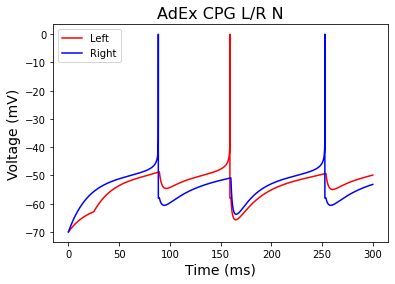

In [128]:
colors = ['r','b']
labels = ['Left','Right']
for i in range(2):
    plt.plot(x,cin_voltage_record[i,:],color = colors[i], label=labels[i])
plt.title('AdEx CPG L/R N',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
plt.legend()
# plt.savefig('adexcpglrdin')

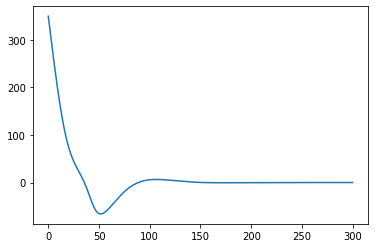

In [88]:
plt.plot(x[:],din_current_record[1,:])

In [645]:
time = 300
delta_t = 0.01

mn_cm = 200
mn_g_L = 10
mn_E_L = -70
mn_E_ex = 0
mn_E_inh = -70
mn_tau_w = 30
tau_ex = 3
delta_g_ex = 0.01
g_ex = 0
delta_g_inh = 100
g_inh = 0
tau_inh = 6
V_T = -50
V_thr = 20
V_reset = -58
din_b = 60 #10
din_a = 0
din_tau_w = 30
slope_f = 2
n_nms = 1

mn_cm = 200
mn_g_L = 10
mn_E_L = -70
V_T = -50
V_thr = 0
V_reset = -58#-55
din_b = 100# 60 #10
din_a = 12#15
din_tau_w = 30 #90
slope_f = 2
n_mns = 2
n_cins = 2
# Voltage vector: size = number of MNs x 1; stored voltage matrix: size = number of recorded neurons x number of time steps. 
n_record = 2
n_timesteps = len(np.arange(0,time,delta_t))
mn_voltage_vec = np.zeros((n_mns,1))
mn_voltage_vec[:,:] += mn_E_L
mn_voltage_record = np.zeros((n_record,n_timesteps))

cin_voltage_vec = np.zeros((n_cins,1))
cin_voltage_vec[:,:] += mn_E_L
cin_voltage_record = np.zeros((n_record,n_timesteps))


# Spike times list of lists: number of lists = number of MNs. 
mn_spike_times = [[] for m in range(n_mns)]

            
mn_w = np.zeros((n_mns,1))
cin_w = np.zeros((n_cins,1))
ws = []
vs_to_plot = []
mn_g_inh = 0
cin_g_inh = 0
cin_spike_times = [[] for m in range(n_cins)]

# cIN -> cIN synapses.
cin_synapses = np.zeros((n_cins,n_cins))
for r in range(n_cins):
    for c in range(n_cins):
        if r < n_cins/2 and c >= n_dins/2 or r >= n_cins/2 and c < n_dins/2:
            cin_synapses[r,c] += 1
                
# cIN -> dIN synapses.
cin_din_synapses = np.zeros((n_cins,n_dins))
for r in range(n_cins):
    for c in range(n_dins):
        if r < n_cins/2 and c >= n_dins/2 or r >= n_cins/2 and c < n_dins/2:
            cin_din_synapses[r,c] += 1
                
cin_g_inh = np.zeros((n_cins,1))
mn_g_inh = np.zeros((n_mns,1))

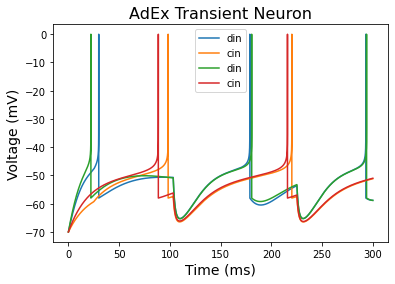

In [646]:
# AdEx dIN

for idx,t in enumerate(np.arange(0,time,delta_t)):
    if t < 25:
        I_L = 150
        I_R = 200
        I_L_din = 350
        I_R_din = 400
    else:
        I_L = 200
        I_R = 200
        I_L_din = 400
        I_R_din = 400
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_reset
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_reset
    if mn_voltage_vec[0,-1] < -45 and mn_voltage_vec[0,-1] > -70:       
        vs_to_plot.append(mn_voltage_vec[0,-1])
        ws.append(w[0,-1])
    for cin in range(n_cins):
        spikes = cin_spike_times[cin]
        for spike in spikes:
            if spike + 5 == t:
                mn_g_inh += cin_din_synapses[cin,-1]*delta_g_inh 
                cin_g_inh += cin_synapses[cin,-1]*delta_g_inh
#     for din in range(n_dins):
#         spikes = din_spike_times[din]
#         for spike in spikes:
#             if spike + 1 == t:
# #                 mn_g_inh += cin_din_synapses[cin,-1]*delta_g_inh 
#                 cin_g_exc += din_cin_synapses[din,-1]*delta_g_exc

    mn_voltage_vec[:int(n_mns/2),-1] += delta_t*((-mn_g_L*(mn_voltage_vec[:int(n_mns/2),-1] - mn_E_L) + mn_g_L * slope_f * np.exp((mn_voltage_vec[:int(n_mns/2),-1] - V_T)/slope_f) \
                                - mn_g_inh[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] - E_inh) + I_L_din - mn_w[:int(n_mns/2),-1]) / mn_cm)
    mn_voltage_vec[int(n_mns/2):,-1] += delta_t*((-mn_g_L*(mn_voltage_vec[int(n_mns/2):,-1] - mn_E_L) + mn_g_L * slope_f * np.exp((mn_voltage_vec[int(n_mns/2):,-1] - V_T)/slope_f) \
                                - mn_g_inh[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] - E_inh) + I_R_din - mn_w[int(n_mns/2):,-1]) / mn_cm)
    cin_voltage_vec[int(n_cins/2):,-1] += delta_t*((-mn_g_L*(cin_voltage_vec[int(n_cins/2):,-1] - mn_E_L) + mn_g_L * slope_f * np.exp((cin_voltage_vec[int(n_cins/2):,-1] - V_T)/slope_f) \
                                        - cin_g_inh[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_inh) \
                                        + I_R - cin_w[int(n_cins/2):,-1]) / mn_cm)
    cin_voltage_vec[:int(n_cins/2),-1] += delta_t*((-mn_g_L*(cin_voltage_vec[:int(n_cins/2),-1] - mn_E_L) + mn_g_L * slope_f * np.exp((cin_voltage_vec[:int(n_cins/2),-1] - V_T)/slope_f) \
                                         - cin_g_inh[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_inh) \
                                        + I_L - cin_w[:int(n_cins/2),-1]) / mn_cm)
#     mn_current_record[:,idx] += -mn_g_L*(mn_voltage_vec[0,-1] - mn_E_L) + mn_g_L * slope_f * np.exp((mn_voltage_vec[0,-1] - V_T)/slope_f) + I - w[0,-1]
    # g_inh += delta_t*(-g_inh/tau_inh)
    mn_w += delta_t*((din_a * (mn_voltage_vec - mn_E_L) - mn_w) / din_tau_w)
    cin_w += delta_t*((mn_a * (cin_voltage_vec - mn_E_L) - cin_w) / mn_tau_w)
    mn_g_inh += delta_t*(-mn_g_inh/tau_inh)
    cin_g_inh += delta_t*(-cin_g_inh/tau_inh)
#     cin_g_inh += delta_t*(-cin_g_inh/tau_inh)
    # if t in ex_ap_list:
    #     g_ex += delta_g_ex
    # if t in inh_ap_list:
    #     g_inh += delta_g_inh
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_thr
            mn_spike_times[mn].append(t)
            mn_w[mn,-1] += din_b
    mn_voltage_record[:,idx] += mn_voltage_vec[:,:].squeeze()
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_thr
            cin_spike_times[cin].append(t)
            cin_w[cin,-1] += mn_b
    cin_voltage_record[:,idx] += cin_voltage_vec[:,:].squeeze()
    # for mn in range(n_mns):
    #     if mn_voltage_vec[mn,-1] >= 20:
    #         mn_voltage_vec[mn,-1] = V_reset
x = np.arange(0,time,delta_t)
vnull_ws = []
wnull_ws = []
vnull = np.arange(-70,-45,1)
for V in np.arange(-70,-45,1):
    vnull_w = -mn_g_L * (V - mn_E_L) + mn_g_L * slope_f * np.exp((V - V_T)/slope_f) + I
    wnull_w = din_a*(V - mn_E_L)
    vnull_ws.append(vnull_w)
    wnull_ws.append(wnull_w)
# plt.plot(vnull, vnull_ws)
# plt.plot(vs_to_plot,ws)
for i in range(2):
    plt.plot(x,mn_voltage_record[i,:],label='din')
    plt.plot(x,cin_voltage_record[i,:],label='cin')
plt.title('AdEx Transient Neuron',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
plt.savefig('transientadex')
plt.legend()
plt.savefig('IFcinsynapsingontodin')

In [624]:
cin_din_synapses

array([[0., 1.]])

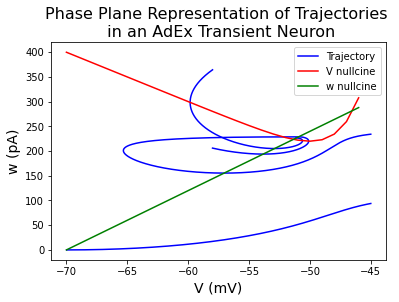

In [504]:
idxs = [0]

for idx,v in enumerate(vs_to_plot):
    if v == V_reset: #and vs_to_plot[idx-1] > -46:
        idxs.append(idx)
split_vs = []
split_ws = []
for idx,val in enumerate(idxs):
    if idx < len(idxs)-1:
        split_vs.append(vs_to_plot[val:idxs[idx+1]])
        split_ws.append(ws[val:idxs[idx+1]])
    else:
        split_vs.append(vs_to_plot[val:])
        split_ws.append(ws[val:])
        

for idx,(traj_v,traj_w) in enumerate(zip(split_vs,split_ws)):
    if idx == 0:
        plt.plot(traj_v,traj_w,color='b',label='Trajectory')
    else:
        plt.plot(traj_v,traj_w,color='b')
plt.plot(vnull, vnull_ws,color='r',label='V nullcine')
plt.plot(vnull, wnull_ws,color='g',label='w nullcine')
plt.title('Phase Plane Representation of Trajectories \n in an AdEx Transient Neuron', fontsize='16')
plt.xlabel('V (mV)',fontsize='14')
plt.ylabel('w (pA)',fontsize='14')
plt.legend()
plt.savefig('phaseplanetransientadex')

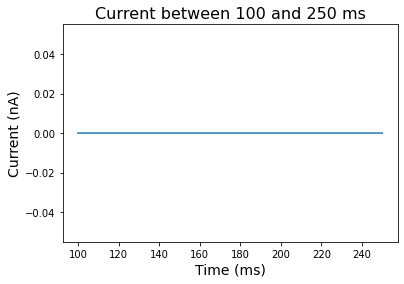

In [119]:
plt.plot(x[10000:25000],mn_current_record[0,10000:25000])
plt.title('Current between 100 and 250 ms',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Current (nA)',fontsize='14')
plt.savefig('current')

# print(split_ws[-1][-10:])

#### a = []
a += []
a

Connect 2 MN neurons and make one inhibit the other when it is firing

In [153]:
time = 300
delta_t = 0.01

cm = 200
g_L = 10
E_L = -70
E_ex = 0
E_inh = -70
tau_ex = 6
delta_g_ex = 1.25 #1.25 #0.01
g_ex = 0
delta_g_inh = 3 #3 #0.01
g_inh = 0
tau_inh = 3
V_T = -50
V_thr = 0
V_reset = -58
mn_b = 60
mn_a = 0
mn_tau_w = 30

slope_f = 2
n_mns = 1
n_ains = 1

# Voltage vector: size = number of MNs x 1; stored voltage matrix: size = number of recorded neurons x number of time steps. 
n_record = 1
n_timesteps = len(np.arange(0,time,delta_t))
mn_voltage_vec = np.zeros((n_mns,1))
mn_voltage_vec[:,:] += E_L
mn_voltage_record = np.zeros((n_record,n_timesteps))
# aINs
ain_voltage_vec = np.zeros((n_ains,1))
ain_voltage_vec[:,:] += E_L
ain_voltage_record = np.zeros((n_record,n_timesteps))

# Spike times list of lists: number of lists = number of MNs. 
mn_spike_times = [[] for m in range(n_mns)]
ain_spike_times = [[] for m in range(n_ains)]

# aIN -> MN synapses.
ain_mn_synapses = np.zeros((n_ains,n_mns))
for r in range(n_ains):
    for c in range(n_mns):
        if r < n_ains/2 and c < n_mns/2 or r >= n_ains/2 and c >= n_mns/2:
            if random.random() < 1:
                ain_mn_synapses[r,c] += 1

mn_g_inh = np.zeros((n_mns,1))
mn_w = np.zeros((n_mns,1))
ain_w = np.zeros((n_ains,1))

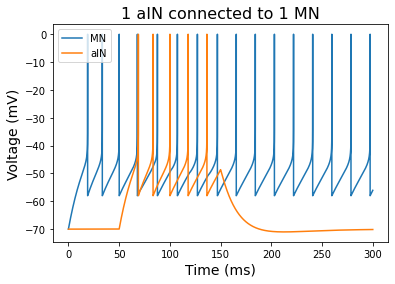

In [154]:
for idx,t in enumerate(np.arange(0,time,delta_t)):
    I_mn = 400
    if t > 50 and t < 150:
        I_ain = 400
    else:
        I_ain = 0
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_reset
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_reset
    # aIN -> MN inhibitory synapses
    for ain in range(n_ains):
        spikes = ain_spike_times[ain]
        for spike in spikes:
            if spike + 1 == t:
                mn_g_inh += ain_mn_synapses[ain,-1]*delta_g_inh
    mn_voltage_vec[:,-1] += delta_t*((-g_L*(mn_voltage_vec[:,-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[:,-1] - V_T)/slope_f) \
                                     - mn_g_inh[:,-1] * (mn_voltage_vec[:,-1] - E_inh) + I_mn - mn_w[:,-1]) / cm)
    ain_voltage_vec[:,-1] += delta_t*((-g_L*(ain_voltage_vec[:,-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[:,-1] - V_T)/slope_f) + I_ain - ain_w[:,-1]) / cm)

    mn_w += delta_t*((mn_a * (mn_voltage_vec - E_L) - mn_w) / mn_tau_w)
    ain_w += delta_t*((mn_a * (ain_voltage_vec - E_L) - ain_w) / mn_tau_w)
    mn_g_inh += delta_t*(-mn_g_inh/tau_inh)
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_thr
            mn_spike_times[mn].append(t)
            mn_w[mn,-1] += mn_b
    mn_voltage_record[:,idx] += mn_voltage_vec[0,:].squeeze()
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_thr
            ain_spike_times[ain].append(t)
            ain_w[ain,-1] += mn_b
    ain_voltage_record[:,idx] += ain_voltage_vec[0,:].squeeze()
    
x = np.arange(0,time,delta_t) 

plt.plot(x,mn_voltage_record[0,:],label='MN')
plt.plot(x,ain_voltage_record[0,:],label='aIN')
plt.title('1 aIN connected to 1 MN',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
ain_w = np.zeros((n_ains,1))
plt.legend()

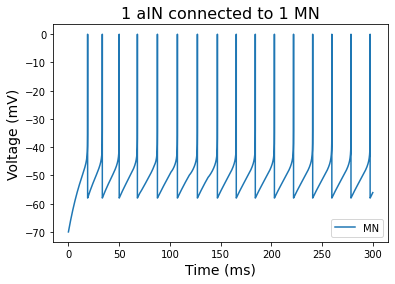

In [156]:
plt.plot(x,mn_voltage_record[0,:],label='MN')
# plt.plot(x,ain_voltage_record[0,:],label='aIN',color='orange')
plt.title('1 aIN connected to 1 MN',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
ain_w = np.zeros((n_ains,1))
plt.legend()
plt.savefig('IF1mn1ainain')

In [250]:
time = 300
delta_t = 0.01

cm = 200
g_L = 10
E_L = -70
E_ex = 0
E_inh = -70
tau_ex = 6
delta_g_ex = 12.5 #1.25 #0.01
g_ex = 0
delta_g_inh = 30 #3 #0.01
g_inh = 0
tau_inh = 3
V_T = -50
V_thr = 0
V_reset = -58
mn_b = 60
mn_a = 0
mn_tau_w = 30

slope_f = 2
n_mns = 2
n_ains = 2
n_cins = 2
n_dins = 2
g_gj = 0.2

# Voltage vector: size = number of MNs x 1; stored voltage matrix: size = number of recorded neurons x number of time steps. 
n_record = 2
n_timesteps = len(np.arange(0,time,delta_t))
mn_voltage_vec = np.zeros((n_mns,1))
mn_voltage_vec[:,:] += E_L
mn_voltage_record = np.zeros((n_record,n_timesteps))
# aINs
ain_voltage_vec = np.zeros((n_ains,1))
ain_voltage_vec[:,:] += E_L
ain_voltage_record = np.zeros((n_record,n_timesteps))
# cINs
cin_voltage_vec = np.zeros((n_cins,1))
cin_voltage_vec[:,:] += E_L
cin_voltage_record = np.zeros((n_record,n_timesteps))
# dINs
din_voltage_vec = np.zeros((n_dins,1))
din_voltage_vec[:,:] += E_L
din_voltage_record = np.zeros((n_record,n_timesteps))
din_current_record = np.zeros((n_record,n_timesteps))

# Spike times list of lists: number of lists = number of MNs. 
mn_spike_times = [[] for m in range(n_mns)]
ain_spike_times = [[] for m in range(n_ains)]
cin_spike_times = [[] for m in range(n_cins)]
din_spike_times = [[] for m in range(n_dins)]

# dIN gap junctions
gap_junctions = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if abs(r-c) < 4 and r != c:
                gap_junctions[r,c] += 1
                
# MN -> MN synapses.
mn_synapses = np.zeros((n_mns,n_mns))
for r in range(n_mns):
    for c in range(n_mns):
        if r < n_mns/2 and c < n_mns/2 or r >= n_mns/2 and c >= n_mns/2:
            if random.random() < 0.05 and r != c:
                mn_synapses[r,c] += 1
                
# # MN -> dIN synapses.
# mn_din_synapses = np.zeros((n_mns,n_dins))
# for r in range(n_mns):
#     for c in range(n_dins):
#         if r < n_mns/2 and c < n_dins/2 or r >= n_mns/2 and c >= n_dins/2:
#             if random.random() < 0 and r != c:
#                 mn_din_synapses[r,c] += 1
                
# MN -> aIN synapses.
mn_ain_synapses = np.zeros((n_mns,n_ains))
for r in range(n_mns):
    for c in range(n_ains):
        if r < n_mns/2 and c < n_ains/2 or r >= n_mns/2 and c >= n_ains/2:
            if random.random() < 0 and r != c:
                mn_ain_synapses[r,c] += 1
                
# MN -> cIN synapses.
mn_cin_synapses = np.zeros((n_mns,n_cins))
for r in range(n_mns):
    for c in range(n_cins):
        if r < n_mns/2 and c < n_cins/2 or r >= n_mns/2 and c >= n_cins/2:
            if random.random() < 0 and r != c:
                mn_cin_synapses[r,c] += 1   
                
# aIN -> MN synapses.
ain_mn_synapses = np.zeros((n_ains,n_mns))
for r in range(n_ains):
    for c in range(n_mns):
        if r < n_ains/2 and c < n_mns/2 or r >= n_ains/2 and c >= n_mns/2:
            if random.random() < 1:
                ain_mn_synapses[r,c] += 1
            
# aIN -> aIN synapses.
ain_synapses = np.zeros((n_ains,n_ains))
for r in range(n_ains):
    for c in range(n_ains):
        if r < n_ains/2 and c < n_ains/2 or r >= n_ains/2 and c >= n_ains/2:
            if random.random() < 1 and r != c:
                ain_synapses[r,c] += 1
                
# aIN -> cIN synapses.
ain_cin_synapses = np.zeros((n_ains,n_cins))
for r in range(n_ains):
    for c in range(n_cins):
        if r < n_ains/2 and c < n_cins/2 or r >= n_ains/2 and c >= n_cins/2:
            if random.random() < 1:
                ain_cin_synapses[r,c] += 1
                
# # aIN -> dIN synapses.
# ain_din_synapses = np.zeros((n_ains,n_dins))
# for r in range(n_ains):
#     for c in range(n_dins):
#         if r < n_ains/2 and c < n_dins/2 or r >= n_ains/2 and c >= n_dins/2:
#             if random.random() < 1:
#                 ain_din_synapses[r,c] += 1
            
# cIN -> aIN synapses.
cin_ain_synapses = np.zeros((n_cins,n_ains))
for r in range(n_cins):
    for c in range(n_ains):
        if r < n_cins/2 and c >= n_ains/2 or r >= n_cins/2 and c < n_ains/2:
            if random.random() < 1:
                cin_ain_synapses[r,c] += 1
            
# cIN -> MN synapses.
cin_mn_synapses = np.zeros((n_cins,n_mns))
for r in range(n_cins):
    for c in range(n_mns):
        if r < n_cins/2 and c >= n_mns/2 or r >= n_cins/2 and c < n_mns/2:
            if random.random() < 1:
                cin_mn_synapses[r,c] += 1
            
# cIN -> cIN synapses.
cin_synapses = np.zeros((n_cins,n_cins))
for r in range(n_cins):
    for c in range(n_cins):
        if r < n_cins/2 and c >= n_cins/2 or r >= n_cins/2 and c < n_cins/2:
            if random.random() < 1:
                cin_synapses[r,c] += 1
                
# # cIN -> dIN synapses.
# cin_din_synapses = np.zeros((n_cins,n_dins))
# for r in range(n_cins):
#     for c in range(n_dins):
#         if r < n_cins/2 and c >= n_dins/2 or r >= n_cins/2 and c < n_dins/2:
#             if random.random() < 1:
#                 cin_din_synapses[r,c] += 1
                
# # dIN -> dIN synapses.
# din_synapses = np.zeros((n_dins,n_dins))
# for r in range(n_dins):
#     for c in range(n_dins):
#         if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
#             if random.random() < 1 and r != c:
#                 din_synapses[r,c] += 1   
                
# # dIN -> MN synapses.
# din_mn_synapses = np.zeros((n_dins,n_mns))
# for r in range(n_dins):
#     for c in range(n_mns):
#         if r < n_dins/2 and c < n_mns/2 or r >= n_dins/2 and c >= n_mns/2:
#             if random.random() < 1:
#                 din_mn_synapses[r,c] += 1
                
# # dIN -> aIN synapses.
# din_ain_synapses = np.zeros((n_dins,n_ains))
# for r in range(n_dins):
#     for c in range(n_ains):
#         if r < n_dins/2 and c < n_ains/2 or r >= n_dins/2 and c >= n_ains/2:
#             if random.random() < 1:
#                 din_ain_synapses[r,c] += 1
                
# # dIN -> cIN synapses.
# din_cin_synapses = np.zeros((n_dins,n_cins))
# for r in range(n_dins):
#     for c in range(n_cins):
#         if r < n_dins/2 and c < n_cins/2 or r >= n_dins/2 and c >= n_cins/2:
#             if random.random() < 1:
#                 din_cin_synapses[r,c] += 1
                
mn_g_ex = np.zeros((n_mns,1))
mn_g_inh = np.zeros((n_mns,1))
mn_w = np.zeros((n_mns,1))
ain_g_ex = np.zeros((n_ains,1))
ain_g_inh = np.zeros((n_ains,1))
ain_w = np.zeros((n_ains,1))
cin_g_ex = np.zeros((n_cins,1))
cin_g_inh = np.zeros((n_cins,1))
cin_w = np.zeros((n_cins,1))
din_g_ex = np.zeros((n_dins,1))
din_g_inh = np.zeros((n_dins,1))
din_w = np.zeros((n_dins,1))
din_ws = []

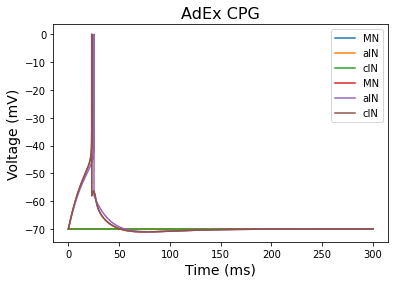

In [251]:
for idx,t in enumerate(np.arange(0,time,delta_t)):
    if t > 25:
        I_L = 300
        I_L_ain = 280
        I_R = 300
        I_R_ain = 280
#         I_L_din = 400
#         I_R_din = 400
    else:
        I_L = 200
        I_L_ain = 180
        I_R = 300
        I_R_ain = 280
#         I_L_din = 350
#         I_R_din = 400

    i_gj = np.zeros((1,n_dins))
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_reset
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_reset
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_reset
#     for din in range(n_dins):
#         if din_voltage_vec[din,-1] >= V_thr:
#             din_voltage_vec[din,-1] = V_reset
    # dIN gap junctions
#     for row in range(n_dins):
#         for c in range(n_dins):
#             i_gj[:,row] += gap_junctions[row,c]*(din_voltage_vec[row,-1] - din_voltage_vec[c,-1])*g_gj
#     i_gj = i_gj.reshape(n_dins,1)
    # AMPA synapses from MNs to CPG
#     for mn in range(n_mns):
#         spikes = mn_spike_times[mn]
#         for spike in spikes:
#             if spike + 1 == t:
#                 mn_g_ex += mn_synapses[mn,-1]*delta_g_ex*6
#                 din_g_ex += mn_din_synapses[mn, -1]*delta_g_ex*6
#                 ain_g_ex += mn_ain_synapses[mn, -1]*delta_g_ex*6
#                 cin_g_ex += mn_cin_synapses[mn, -1]*delta_g_ex*6
    # dIN -> MN/aIN/cIN/dIN excitatory synapses
#     for din in range(n_dins):
#         spikes = din_spike_times[din]
#         for spike in spikes:
#             if spike + 1 == t:
#                 din_g_ex += din_synapses[din,-1]*delta_g_ex*8
#                 mn_g_ex += din_mn_synapses[din,-1]*delta_g_ex*6
#                 ain_g_ex += din_ain_synapses[din,-1]*delta_g_ex
#                 cin_g_ex += din_cin_synapses[din,-1]*delta_g_ex*6
    # aIN -> MN/aIN/cIN/dIN inhibitory synapses
    for ain in range(n_ains):
        spikes = ain_spike_times[ain]
        for spike in spikes:
            if spike + 1 == t:
                mn_g_inh += ain_mn_synapses[ain,-1]*delta_g_inh
                ain_g_inh += ain_synapses[ain,-1]*delta_g_inh
                cin_g_inh += ain_cin_synapses[ain,-1]*delta_g_inh
#                 din_g_inh += ain_din_synapses[ain,-1]*delta_g_inh
    # cIN -> aIN/MN/dIN synapses
    for cin in range(n_cins):
        spikes = cin_spike_times[cin]
        for spike in spikes:
            if spike + 1 == t:
                mn_g_inh += cin_mn_synapses[cin,-1]*delta_g_inh
                ain_g_inh += cin_ain_synapses[cin,-1]*delta_g_inh
                cin_g_inh += cin_synapses[cin,-1]*delta_g_inh
#                 din_g_inh += cin_din_synapses[cin,-1]*delta_g_inh 
    mn_voltage_vec[:int(n_mns/2),-1] += delta_t*((-g_L*(mn_voltage_vec[:int(n_mns/2),-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[:int(n_mns/2),-1] - V_T)/slope_f) \
                                     - mn_g_ex[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] - E_ex) - mn_g_inh[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] \
                                     - E_inh) + I_L - mn_w[:int(n_mns/2),-1]) / cm)
    mn_voltage_vec[int(n_mns/2):,-1] += delta_t*((-g_L*(mn_voltage_vec[int(n_mns/2):,-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[int(n_mns/2):,-1] - V_T)/slope_f) \
                                     - mn_g_ex[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] - E_ex) - mn_g_inh[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] \
                                     - E_inh) + I_R - mn_w[int(n_mns/2):,-1]) / cm)
    ain_voltage_vec[:int(n_ains/2),-1] += delta_t*((-g_L*(ain_voltage_vec[:int(n_ains/2),-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[:int(n_ains/2),-1] - V_T)/slope_f) \
                                          - ain_g_ex[:int(n_ains/2),-1] * (ain_voltage_vec[:int(n_ains/2),-1] - E_ex) \
                                          - ain_g_inh[:int(n_ains/2),-1] * (ain_voltage_vec[:int(n_ains/2),-1] - E_inh) + I_L_ain - ain_w[:int(n_ains/2),-1]) / cm)
    ain_voltage_vec[int(n_ains/2):,-1] += delta_t*((-g_L*(ain_voltage_vec[int(n_ains/2):,-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[int(n_ains/2):,-1] - V_T)/slope_f) \
                                          - ain_g_ex[int(n_ains/2):,-1] * (ain_voltage_vec[int(n_ains/2):,-1] - E_ex) \
                                          - ain_g_inh[int(n_ains/2):,-1] * (ain_voltage_vec[int(n_ains/2):,-1] - E_inh) + I_R_ain - ain_w[int(n_ains/2):,-1]) / cm)
    cin_voltage_vec[:int(n_cins/2),-1] += delta_t*((-g_L*(cin_voltage_vec[:int(n_cins/2),-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[:int(n_cins/2),-1] - V_T)/slope_f) \
                                          - cin_g_ex[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_ex) \
                                          - cin_g_inh[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_inh) + I_L - cin_w[:int(n_cins/2),-1]) / cm)
    cin_voltage_vec[int(n_cins/2):,-1] += delta_t*((-g_L*(cin_voltage_vec[int(n_cins/2):,-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[int(n_cins/2):,-1] - V_T)/slope_f) \
                                          - cin_g_ex[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_ex) \
                                          - cin_g_inh[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_inh) + I_R - cin_w[int(n_cins/2):,-1]) / cm)
#     din_voltage_vec[:int(n_dins/2),-1] += delta_t*((-g_L*(din_voltage_vec[:int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[:int(n_dins/2),-1] - V_T)/slope_f) \
#                                           - din_g_ex[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_ex) \
#                                           - din_g_inh[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_inh) - i_gj[:int(n_dins/2),-1] \
#                                           + I_L_din - din_w[:int(n_dins/2),-1]) / cm)
#     din_voltage_vec[int(n_dins/2):,-1] += delta_t*((-g_L*(din_voltage_vec[int(n_dins/2):,-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2):,-1] - V_T)/slope_f) \
#                                           - din_g_ex[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_ex) \
#                                           - din_g_inh[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_inh) - i_gj[int(n_dins/2):,-1] \
#                                           + I_R_din - din_w[int(n_dins/2):,-1]) / cm)
    
    mn_w += delta_t*((mn_a * (mn_voltage_vec - E_L) - mn_w) / mn_tau_w)
    ain_w += delta_t*((mn_a * (ain_voltage_vec - E_L) - ain_w) / mn_tau_w)
    cin_w += delta_t*((mn_a * (cin_voltage_vec - E_L) - cin_w) / mn_tau_w)
#     din_w += delta_t*((mn_a * (din_voltage_vec - E_L) - din_w) / mn_tau_w)
#     din_ws.append(din_w[0,-1])
    mn_g_ex += delta_t*(-mn_g_ex/tau_ex)
    mn_g_inh += delta_t*(-mn_g_inh/tau_inh)
    ain_g_ex += delta_t*(-ain_g_ex/tau_ex)
    ain_g_inh += delta_t*(-ain_g_inh/tau_inh)
    cin_g_ex += delta_t*(-cin_g_ex/tau_ex)
    cin_g_inh += delta_t*(-cin_g_inh/tau_inh)
#     din_g_ex += delta_t*(-din_g_ex/tau_ex)
#     din_g_inh += delta_t*(-din_g_inh/tau_inh)
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_thr
            mn_spike_times[mn].append(t)
            mn_w[mn,-1] += mn_b
    mn_voltage_record[:,idx] += mn_voltage_vec[[0,int(n_mns/2)],:].squeeze()
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_thr
            ain_spike_times[ain].append(t)
            ain_w[ain,-1] += mn_b
    ain_voltage_record[:,idx] += ain_voltage_vec[[0,int(n_ains/2)],:].squeeze()
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_thr
            cin_spike_times[cin].append(t)
            cin_w[cin,-1] += mn_b
    cin_voltage_record[:,idx] += cin_voltage_vec[[0,int(n_cins/2)],:].squeeze()
#     for din in range(n_dins):
#         if din_voltage_vec[din,-1] >= V_thr:
#             din_voltage_vec[din,-1] = V_thr
#             din_spike_times[din].append(t)
#             din_w[din,-1] += mn_b
#     din_voltage_record[:,idx] += din_voltage_vec[[0,int(n_dins/2)],:].squeeze()
    
x = np.arange(0,time,delta_t) 

for i in range(2):
    plt.plot(x,mn_voltage_record[i,:],label='MN')
    plt.plot(x,ain_voltage_record[i,:],label='aIN')
    plt.plot(x,cin_voltage_record[i,:],label='cIN')
#     plt.plot(x,din_voltage_record[i,:],label='dIN')
plt.title('AdEx CPG',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
plt.legend()
# plt.savefig('IFCPGmnaincin')

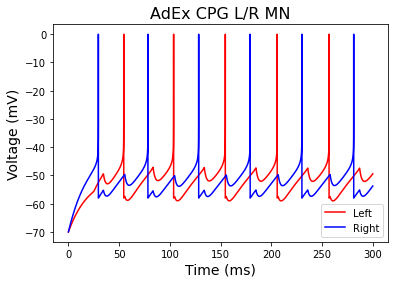

In [247]:
colors = ['r','b']
labels = ['Left','Right']
for i in range(2):
    plt.plot(x,mn_voltage_record[i,:],color = colors[i], label=labels[i])
# plt.plot(x,mn_voltage_record[1,:])
plt.title('AdEx CPG L/R MN',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
plt.legend()
plt.savefig('adexcpgmnlr')

In [233]:
plt.plot(x,mn_voltage_record[1,:],color = colors[i], label=labels[i])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [550]:
time = 400
delta_t = 0.01

din_b = 100
din_a = 12
din_tau_w = 30
din_cm = 200

cm = 200
g_L = 10
E_L = -70
E_ex = 0
E_inh = -70
tau_ex = 6
delta_g_ex = 0.0#1.25 #0.01
g_ex = 0
delta_g_inh = 100 #3 #0.01
g_inh = 0
tau_inh = 3
V_T = -50
V_thr = 0
V_reset = -58
mn_b = 60
mn_a = 0
mn_tau_w = 30

slope_f = 2
n_cins = 2
n_dins = 2
g_gj = 0.2

# Voltage vector: size = number of MNs x 1; stored voltage matrix: size = number of recorded neurons x number of time steps. 
n_record = 2
n_timesteps = len(np.arange(0,time,delta_t))

# cINs
cin_voltage_vec = np.zeros((n_cins,1))
cin_voltage_vec[:,:] += E_L
cin_voltage_record = np.zeros((n_record,n_timesteps))
# dINs
din_voltage_vec = np.zeros((n_dins,1))
din_voltage_vec[:,:] += E_L
din_voltage_record = np.zeros((n_record,n_timesteps))
din_current_record = np.zeros((n_record,n_timesteps))

# Spike times list of lists: number of lists = number of MNs. 
mn_spike_times = [[] for m in range(n_mns)]
ain_spike_times = [[] for m in range(n_ains)]
cin_spike_times = [[] for m in range(n_cins)]
din_spike_times = [[] for m in range(n_dins)]

# dIN gap junctions
gap_junctions = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if abs(r-c) < 4 and r != c:
                gap_junctions[r,c] += 1
                   

# cIN -> cIN synapses.
cin_synapses = np.zeros((n_cins,n_cins))
for r in range(n_cins):
    for c in range(n_cins):
        if r < n_cins/2 and c >= n_cins/2 or r >= n_cins/2 and c < n_cins/2:
            if random.random() < 1:
                cin_synapses[r,c] += 1
                
# cIN -> dIN synapses.
cin_din_synapses = np.zeros((n_cins,n_dins))
for r in range(n_cins):
    for c in range(n_dins):
        if r < n_cins/2 and c >= n_dins/2 or r >= n_cins/2 and c < n_dins/2:
            if random.random() < 1:
                cin_din_synapses[r,c] += 1
                
# dIN -> dIN synapses.
din_synapses = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if random.random() < 1 and r != c:
                din_synapses[r,c] += 1   
                
# dIN -> cIN synapses.
din_cin_synapses = np.zeros((n_dins,n_cins))
for r in range(n_dins):
    for c in range(n_cins):
        if r < n_dins/2 and c < n_cins/2 or r >= n_dins/2 and c >= n_cins/2:
            if random.random() < 1:
                din_cin_synapses[r,c] += 1

cin_g_ex = np.zeros((n_cins,1))
cin_g_inh = np.zeros((n_cins,1))
cin_w = np.zeros((n_cins,1))
din_g_ex = np.zeros((n_dins,1))
din_g_inh = np.zeros((n_dins,1))
din_w = np.zeros((n_dins,1))
din_ws = []

In [542]:
print(din_cin_synapses)

[[1. 0.]
 [0. 1.]]


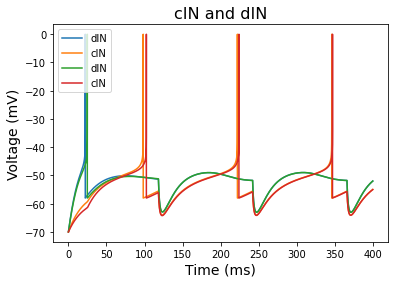

In [551]:

for idx,t in enumerate(np.arange(0,time,delta_t)):
    if t < 25:
        I_L = 150
        I_R = 120
        I_R_din = 380
        I_L_din = 400
    else:
        I_L = 200
        I_R = 200
        I_R_din = 400
        I_L_din = 400
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_reset
    for din in range(n_dins):
        if din_voltage_vec[din,-1] >= V_thr:
            din_voltage_vec[din,-1] = V_reset
    # dIN -> MN/aIN/cIN/dIN excitatory synapses
#     for din in range(n_dins):
#         spikes = din_spike_times[din]
#         for spike in spikes:
#             if spike + 2 == t:
#                 din_g_ex += din_synapses[din,-1]*delta_g_ex
#                 cin_g_ex += din_cin_synapses[din,-1]*delta_g_ex*6
    # cIN -> aIN/MN/dIN synapses
    for cin in range(n_cins):
        spikes = cin_spike_times[cin]
        for spike in spikes:
            if spike + 20 == t:
                din_g_inh += cin_din_synapses[cin,-1]*delta_g_inh 
                cin_g_inh += cin_synapses[cin,-1]*delta_g_inh

    cin_voltage_vec[:int(n_cins/2),-1] += delta_t*((-g_L*(cin_voltage_vec[:int(n_cins/2),-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[:int(n_cins/2),-1] - V_T)/slope_f) \
#                                           - cin_g_ex[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_ex) \
                                          - cin_g_inh[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_inh) + I_L - cin_w[:int(n_cins/2),-1]) / cm)
    cin_voltage_vec[int(n_cins/2):,-1] += delta_t*((-g_L*(cin_voltage_vec[int(n_cins/2):,-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[int(n_cins/2):,-1] - V_T)/slope_f) \
#                                           - cin_g_ex[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_ex) \
                                          - cin_g_inh[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_inh) + I_R - cin_w[int(n_cins/2):,-1]) / cm)
    din_voltage_vec[:int(n_dins/2),-1] += delta_t*((-g_L*(din_voltage_vec[:int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[:int(n_dins/2),-1] - V_T)/slope_f) \
#                                           - din_g_ex[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_ex) \
                                          - din_g_inh[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_inh) \
                                          + I_L_din - din_w[:int(n_dins/2),-1]) / din_cm)
    din_voltage_vec[int(n_dins/2):,-1] += delta_t*((-g_L*(din_voltage_vec[int(n_dins/2):,-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2):,-1] - V_T)/slope_f) \
#                                           - din_g_ex[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_ex) \
                                          - din_g_inh[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_inh) \
                                          + I_R_din - din_w[int(n_dins/2):,-1]) / din_cm)
    cin_w += delta_t*((mn_a * (cin_voltage_vec - E_L) - cin_w) / mn_tau_w)
    din_w += delta_t*((din_a * (din_voltage_vec - E_L) - din_w) / din_tau_w)
#     cin_g_ex += delta_t*(-cin_g_ex/tau_ex)
    cin_g_inh += delta_t*(-cin_g_inh/tau_inh)
#     din_g_ex += delta_t*(-din_g_ex/tau_ex)
    din_g_inh += delta_t*(-din_g_inh/tau_inh)
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_thr
            cin_spike_times[cin].append(t)
            cin_w[cin,-1] += mn_b
    cin_voltage_record[:,idx] += cin_voltage_vec[[0,int(n_cins/2)],:].squeeze()
    for din in range(n_dins):
        if din_voltage_vec[din,-1] >= V_thr:
            din_voltage_vec[din,-1] = V_thr
            din_spike_times[din].append(t)
            din_w[din,-1] += din_b
    din_voltage_record[:,idx] += din_voltage_vec[[0,int(n_dins/2)],:].squeeze()
    
x = np.arange(0,time,delta_t) 

for i in range(2):
    plt.plot(x,din_voltage_record[i,:],label='dIN')
    plt.plot(x,cin_voltage_record[i,:],label='cIN')
plt.title('cIN and dIN',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
ain_w = np.zeros((n_ains,1))
plt.legend()
plt.savefig('IFcindin')

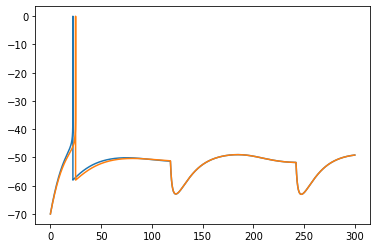

In [545]:
for i in range(2):
    plt.plot(x,din_voltage_record[i,:],label='dIN')

In [571]:
time = 100
delta_t = 0.01

din_b = 100
din_a = 12
din_tau_w = 30
din_cm = 200

cm = 200
g_L = 10
E_L = -70
E_ex = 0
E_inh = -70
tau_ex = 6
delta_g_ex = 1.25 #1.25 #0.01
g_ex = 0
delta_g_inh = 30 #3 #0.01
g_inh = 0
tau_inh = 3
V_T = -50
V_thr = 0
V_reset = -58
mn_b = 60
mn_a = 0
mn_tau_w = 30

slope_f = 2
n_mns = 2
n_ains = 2
n_cins = 2
n_dins = 2
g_gj = 0.2

# Voltage vector: size = number of MNs x 1; stored voltage matrix: size = number of recorded neurons x number of time steps. 
n_record = 2
n_timesteps = len(np.arange(0,time,delta_t))
mn_voltage_vec = np.zeros((n_mns,1))
mn_voltage_vec[:,:] += E_L
mn_voltage_record = np.zeros((n_record,n_timesteps))
# aINs
ain_voltage_vec = np.zeros((n_ains,1))
ain_voltage_vec[:,:] += E_L
ain_voltage_record = np.zeros((n_record,n_timesteps))
# cINs
cin_voltage_vec = np.zeros((n_cins,1))
cin_voltage_vec[:,:] += E_L
cin_voltage_record = np.zeros((n_record,n_timesteps))
# dINs
din_voltage_vec = np.zeros((n_dins,1))
din_voltage_vec[:,:] += E_L
din_voltage_record = np.zeros((n_record,n_timesteps))
din_current_record = np.zeros((n_record,n_timesteps))

# Spike times list of lists: number of lists = number of MNs. 
mn_spike_times = [[] for m in range(n_mns)]
ain_spike_times = [[] for m in range(n_ains)]
cin_spike_times = [[] for m in range(n_cins)]
din_spike_times = [[] for m in range(n_dins)]

# dIN gap junctions
gap_junctions = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if abs(r-c) < 4 and r != c:
                gap_junctions[r,c] += 1
                
# MN -> MN synapses.
mn_synapses = np.zeros((n_mns,n_mns))
for r in range(n_mns):
    for c in range(n_mns):
        if r < n_mns/2 and c < n_mns/2 or r >= n_mns/2 and c >= n_mns/2:
            if random.random() < 0.05 and r != c:
                mn_synapses[r,c] += 1
                
# MN -> dIN synapses.
mn_din_synapses = np.zeros((n_mns,n_dins))
for r in range(n_mns):
    for c in range(n_dins):
        if r < n_mns/2 and c < n_dins/2 or r >= n_mns/2 and c >= n_dins/2:
            if random.random() < 0.05 and r != c:
                mn_din_synapses[r,c] += 1
                
# MN -> aIN synapses.
mn_ain_synapses = np.zeros((n_mns,n_ains))
for r in range(n_mns):
    for c in range(n_ains):
        if r < n_mns/2 and c < n_ains/2 or r >= n_mns/2 and c >= n_ains/2:
            if random.random() < 0.05 and r != c:
                mn_ain_synapses[r,c] += 1
                
# MN -> cIN synapses.
mn_cin_synapses = np.zeros((n_mns,n_cins))
for r in range(n_mns):
    for c in range(n_cins):
        if r < n_mns/2 and c < n_cins/2 or r >= n_mns/2 and c >= n_cins/2:
            if random.random() < 0.05 and r != c:
                mn_cin_synapses[r,c] += 1   
                
# aIN -> MN synapses.
ain_mn_synapses = np.zeros((n_ains,n_mns))
for r in range(n_ains):
    for c in range(n_mns):
        if r < n_ains/2 and c < n_mns/2 or r >= n_ains/2 and c >= n_mns/2:
            if random.random() < 1:
                ain_mn_synapses[r,c] += 1
            
# aIN -> aIN synapses.
ain_synapses = np.zeros((n_ains,n_ains))
for r in range(n_ains):
    for c in range(n_ains):
        if r < n_ains/2 and c < n_ains/2 or r >= n_ains/2 and c >= n_ains/2:
            if random.random() < 1 and r != c:
                ain_synapses[r,c] += 1
                
# aIN -> cIN synapses.
ain_cin_synapses = np.zeros((n_ains,n_cins))
for r in range(n_ains):
    for c in range(n_cins):
        if r < n_ains/2 and c < n_cins/2 or r >= n_ains/2 and c >= n_cins/2:
            if random.random() < 1:
                ain_cin_synapses[r,c] += 1
                
# aIN -> dIN synapses.
ain_din_synapses = np.zeros((n_ains,n_dins))
for r in range(n_ains):
    for c in range(n_dins):
        if r < n_ains/2 and c < n_dins/2 or r >= n_ains/2 and c >= n_dins/2:
            if random.random() < 1:
                ain_din_synapses[r,c] += 1
            
# cIN -> aIN synapses.
cin_ain_synapses = np.zeros((n_cins,n_ains))
for r in range(n_cins):
    for c in range(n_ains):
        if r < n_cins/2 and c >= n_ains/2 or r >= n_cins/2 and c < n_ains/2:
            if random.random() < 1:
                cin_ain_synapses[r,c] += 1
            
# cIN -> MN synapses.
cin_mn_synapses = np.zeros((n_cins,n_mns))
for r in range(n_cins):
    for c in range(n_mns):
        if r < n_cins/2 and c >= n_mns/2 or r >= n_cins/2 and c < n_mns/2:
            if random.random() < 1:
                cin_mn_synapses[r,c] += 1
            
# cIN -> cIN synapses.
cin_synapses = np.zeros((n_cins,n_cins))
for r in range(n_cins):
    for c in range(n_cins):
        if r < n_cins/2 and c >= n_cins/2 or r >= n_cins/2 and c < n_cins/2:
            if random.random() < 1:
                cin_synapses[r,c] += 1
                
# cIN -> dIN synapses.
cin_din_synapses = np.zeros((n_cins,n_dins))
for r in range(n_cins):
    for c in range(n_dins):
        if r < n_cins/2 and c >= n_dins/2 or r >= n_cins/2 and c < n_dins/2:
            if random.random() < 1:
                cin_din_synapses[r,c] += 1
                
# dIN -> dIN synapses.
din_synapses = np.zeros((n_dins,n_dins))
for r in range(n_dins):
    for c in range(n_dins):
        if r < n_dins/2 and c < n_dins/2 or r >= n_dins/2 and c >= n_dins/2:
            if random.random() < 1 and r != c:
                din_synapses[r,c] += 1   
                
# dIN -> MN synapses.
din_mn_synapses = np.zeros((n_dins,n_mns))
for r in range(n_dins):
    for c in range(n_mns):
        if r < n_dins/2 and c < n_mns/2 or r >= n_dins/2 and c >= n_mns/2:
            if random.random() < 1:
                din_mn_synapses[r,c] += 1
                
# dIN -> aIN synapses.
din_ain_synapses = np.zeros((n_dins,n_ains))
for r in range(n_dins):
    for c in range(n_ains):
        if r < n_dins/2 and c < n_ains/2 or r >= n_dins/2 and c >= n_ains/2:
            if random.random() < 1:
                din_ain_synapses[r,c] += 1
                
# dIN -> cIN synapses.
din_cin_synapses = np.zeros((n_dins,n_cins))
for r in range(n_dins):
    for c in range(n_cins):
        if r < n_dins/2 and c < n_cins/2 or r >= n_dins/2 and c >= n_cins/2:
            if random.random() < 1:
                din_cin_synapses[r,c] += 1
                
mn_g_ex = np.zeros((n_mns,1))
mn_g_inh = np.zeros((n_mns,1))
mn_w = np.zeros((n_mns,1))
ain_g_ex = np.zeros((n_ains,1))
ain_g_inh = np.zeros((n_ains,1))
ain_w = np.zeros((n_ains,1))
cin_g_ex = np.zeros((n_cins,1))
cin_g_inh = np.zeros((n_cins,1))
cin_w = np.zeros((n_cins,1))
din_g_ex = np.zeros((n_dins,1))
din_g_inh = np.zeros((n_dins,1))
din_w = np.zeros((n_dins,1))
din_ws = []

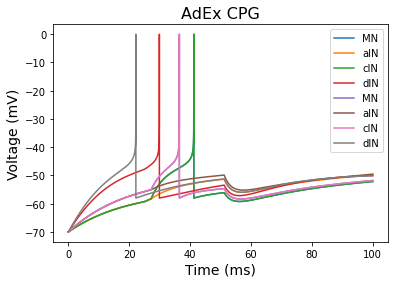

In [572]:
for idx,t in enumerate(np.arange(0,time,delta_t)):
    if t > 25:
        I_L = 200
        I_R = 200
        I_L_din = 400
        I_R_din = 400
    else:
        I_L = 150
        I_R = 200
        I_L_din = 350
        I_R_din = 400
    i_gj = np.zeros((1,n_dins))
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_reset
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_reset
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_reset
    for din in range(n_dins):
        if din_voltage_vec[din,-1] >= V_thr:
            din_voltage_vec[din,-1] = V_reset
    # dIN gap junctions
    for row in range(n_dins):
        for c in range(n_dins):
            i_gj[:,row] += gap_junctions[row,c]*(din_voltage_vec[row,-1] - din_voltage_vec[c,-1])*g_gj
    i_gj = i_gj.reshape(n_dins,1)
    # AMPA synapses from MNs to CPG
#     for mn in range(n_mns):
#         spikes = mn_spike_times[mn]
#         for spike in spikes:
#             if spike + 1 == t:
#                 mn_g_ex += mn_synapses[mn,-1]*delta_g_ex*6
#                 din_g_ex += mn_din_synapses[mn, -1]*delta_g_ex*6
#                 ain_g_ex += mn_ain_synapses[mn, -1]*delta_g_ex*6
#                 cin_g_ex += mn_cin_synapses[mn, -1]*delta_g_ex*6
    # dIN -> MN/aIN/cIN/dIN excitatory synapses
    for din in range(n_dins):
        spikes = din_spike_times[din]
        for spike in spikes:
            if spike + 5 == t:
#                 din_g_ex += din_synapses[din,-1]*delta_g_ex*6
                mn_g_ex += din_mn_synapses[din,-1]*delta_g_ex*6
                ain_g_ex += din_ain_synapses[din,-1]*delta_g_ex
                cin_g_ex += din_cin_synapses[din,-1]*delta_g_ex*6
    # aIN -> MN/aIN/cIN/dIN inhibitory synapses
    for ain in range(n_ains):
        spikes = ain_spike_times[ain]
        for spike in spikes:
            if spike + 5 == t:
                mn_g_inh += ain_mn_synapses[ain,-1]*delta_g_inh
                ain_g_inh += ain_synapses[ain,-1]*delta_g_inh
                cin_g_inh += ain_cin_synapses[ain,-1]*delta_g_inh
                din_g_inh += ain_din_synapses[ain,-1]*delta_g_inh
    # cIN -> aIN/MN/dIN/cIN synapses
    for cin in range(n_cins):
        spikes = cin_spike_times[cin]
        for spike in spikes:
            if spike + 10 == t:
                mn_g_inh += cin_mn_synapses[cin,-1]*delta_g_inh
                ain_g_inh += cin_ain_synapses[cin,-1]*delta_g_inh
                cin_g_inh += cin_synapses[cin,-1]*delta_g_inh
                din_g_inh += cin_din_synapses[cin,-1]*delta_g_inh 
    mn_voltage_vec[:int(n_mns/2),-1] += delta_t*((-g_L*(mn_voltage_vec[:int(n_mns/2),-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[:int(n_mns/2),-1] - V_T)/slope_f) \
                                     - mn_g_ex[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] - E_ex) - mn_g_inh[:int(n_mns/2),-1] * (mn_voltage_vec[:int(n_mns/2),-1] \
                                     - E_inh) + I_L - mn_w[:int(n_mns/2),-1]) / cm)
    mn_voltage_vec[int(n_mns/2):,-1] += delta_t*((-g_L*(mn_voltage_vec[int(n_mns/2):,-1] - E_L) + g_L * slope_f * np.exp((mn_voltage_vec[int(n_mns/2):,-1] - V_T)/slope_f) \
                                     - mn_g_ex[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] - E_ex) - mn_g_inh[int(n_mns/2):,-1] * (mn_voltage_vec[int(n_mns/2):,-1] \
                                     - E_inh) + I_R - mn_w[int(n_mns/2):,-1]) / cm)
    ain_voltage_vec[:int(n_ains/2),-1] += delta_t*((-g_L*(ain_voltage_vec[:int(n_ains/2),-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[:int(n_ains/2),-1] - V_T)/slope_f) \
                                          - ain_g_ex[:int(n_ains/2),-1] * (ain_voltage_vec[:int(n_ains/2),-1] - E_ex) \
                                          - ain_g_inh[:int(n_ains/2),-1] * (ain_voltage_vec[:int(n_ains/2),-1] - E_inh) + I_L - ain_w[:int(n_ains/2),-1]) / cm)
    ain_voltage_vec[int(n_ains/2):,-1] += delta_t*((-g_L*(ain_voltage_vec[int(n_ains/2):,-1] - E_L) + g_L * slope_f * np.exp((ain_voltage_vec[int(n_ains/2):,-1] - V_T)/slope_f) \
                                          - ain_g_ex[int(n_ains/2):,-1] * (ain_voltage_vec[int(n_ains/2):,-1] - E_ex) \
                                          - ain_g_inh[int(n_ains/2):,-1] * (ain_voltage_vec[int(n_ains/2):,-1] - E_inh) + I_R - ain_w[int(n_ains/2):,-1]) / cm)
    cin_voltage_vec[:int(n_cins/2),-1] += delta_t*((-g_L*(cin_voltage_vec[:int(n_cins/2),-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[:int(n_cins/2),-1] - V_T)/slope_f) \
                                          - cin_g_ex[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_ex) \
                                          - cin_g_inh[:int(n_cins/2),-1] * (cin_voltage_vec[:int(n_cins/2),-1] - E_inh) + I_L - cin_w[:int(n_cins/2),-1]) / cm)
    cin_voltage_vec[int(n_cins/2):,-1] += delta_t*((-g_L*(cin_voltage_vec[int(n_cins/2):,-1] - E_L) + g_L * slope_f * np.exp((cin_voltage_vec[int(n_cins/2):,-1] - V_T)/slope_f) \
                                          - cin_g_ex[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_ex) \
                                          - cin_g_inh[int(n_cins/2):,-1] * (cin_voltage_vec[int(n_cins/2):,-1] - E_inh) + I_R - cin_w[int(n_cins/2):,-1]) / cm)
    din_voltage_vec[:int(n_dins/2),-1] += delta_t*((-g_L*(din_voltage_vec[:int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[:int(n_dins/2),-1] - V_T)/slope_f) \
                                          - din_g_ex[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_ex) \
                                          - din_g_inh[:int(n_dins/2),-1] * (din_voltage_vec[:int(n_dins/2),-1] - E_inh) - i_gj[:int(n_dins/2),-1] \
                                          + I_L_din - din_w[:int(n_dins/2),-1]) / din_cm)
    din_voltage_vec[int(n_dins/2):,-1] += delta_t*((-g_L*(din_voltage_vec[int(n_dins/2):,-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2):,-1] - V_T)/slope_f) \
                                          - din_g_ex[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_ex) \
                                          - din_g_inh[int(n_dins/2):,-1] * (din_voltage_vec[int(n_dins/2):,-1] - E_inh) - i_gj[int(n_dins/2):,-1] \
                                          + I_R_din - din_w[int(n_dins/2):,-1]) / din_cm)
    din_current_record[0,idx] += - g_L*(din_voltage_vec[0,-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[0,-1] - V_T)/slope_f) \
                                 - din_g_ex[0,-1] * (din_voltage_vec[0,-1] - E_ex) - din_g_inh[0,-1] * (din_voltage_vec[0,-1] - E_inh) - i_gj[0,-1] + I_R_din - din_w[0,-1]
    din_current_record[1,idx] += - g_L*(din_voltage_vec[int(n_dins/2),-1] - E_L) + g_L * slope_f * np.exp((din_voltage_vec[int(n_dins/2),-1] - V_T)/slope_f) \
                                 - din_g_ex[int(n_dins/2),-1] * (din_voltage_vec[int(n_dins/2),-1] - E_ex) \
                                 - din_g_inh[int(n_dins/2),-1] * (din_voltage_vec[int(n_dins/2),-1] - E_inh) - i_gj[int(n_dins/2),-1] + I_R_din - din_w[int(n_dins/2),-1]
    mn_w += delta_t*((mn_a * (mn_voltage_vec - E_L) - mn_w) / mn_tau_w)
    ain_w += delta_t*((mn_a * (ain_voltage_vec - E_L) - ain_w) / mn_tau_w)
    cin_w += delta_t*((mn_a * (cin_voltage_vec - E_L) - cin_w) / mn_tau_w)
    din_w += delta_t*((din_a * (din_voltage_vec - E_L) - din_w) / din_tau_w)
    din_ws.append(din_w[0,-1])
    mn_g_ex += delta_t*(-mn_g_ex/tau_ex)
    mn_g_inh += delta_t*(-mn_g_inh/tau_inh)
    ain_g_ex += delta_t*(-ain_g_ex/tau_ex)
    ain_g_inh += delta_t*(-ain_g_inh/tau_inh)
    cin_g_ex += delta_t*(-cin_g_ex/tau_ex)
    cin_g_inh += delta_t*(-cin_g_inh/tau_inh)
    din_g_ex += delta_t*(-din_g_ex/tau_ex)
    din_g_inh += delta_t*(-din_g_inh/tau_inh)
    for mn in range(n_mns):
        if mn_voltage_vec[mn,-1] >= V_thr:
            mn_voltage_vec[mn,-1] = V_thr
            mn_spike_times[mn].append(t)
            mn_w[mn,-1] += mn_b
    mn_voltage_record[:,idx] += mn_voltage_vec[[0,int(n_mns/2)],:].squeeze()
    for ain in range(n_ains):
        if ain_voltage_vec[ain,-1] >= V_thr:
            ain_voltage_vec[ain,-1] = V_thr
            ain_spike_times[ain].append(t)
            ain_w[ain,-1] += mn_b
    ain_voltage_record[:,idx] += ain_voltage_vec[[0,int(n_ains/2)],:].squeeze()
    for cin in range(n_cins):
        if cin_voltage_vec[cin,-1] >= V_thr:
            cin_voltage_vec[cin,-1] = V_thr
            cin_spike_times[cin].append(t)
            cin_w[cin,-1] += mn_b
    cin_voltage_record[:,idx] += cin_voltage_vec[[0,int(n_cins/2)],:].squeeze()
    for din in range(n_dins):
        if din_voltage_vec[din,-1] >= V_thr:
            din_voltage_vec[din,-1] = V_thr
            din_spike_times[din].append(t)
            din_w[din,-1] += din_b
    din_voltage_record[:,idx] += din_voltage_vec[[0,int(n_dins/2)],:].squeeze()
    
x = np.arange(0,time,delta_t) 

for i in range(2):
    plt.plot(x,mn_voltage_record[i,:],label='MN')
    plt.plot(x,ain_voltage_record[i,:],label='aIN')
    plt.plot(x,cin_voltage_record[i,:],label='cIN')
    plt.plot(x,din_voltage_record[i,:],label='dIN')
plt.title('AdEx CPG',fontsize='16')
plt.xlabel('Time (ms)',fontsize='14')
plt.ylabel('Voltage (mV)',fontsize='14')
ain_w = np.zeros((n_ains,1))
plt.legend()
# plt.savefig('adexcpg')

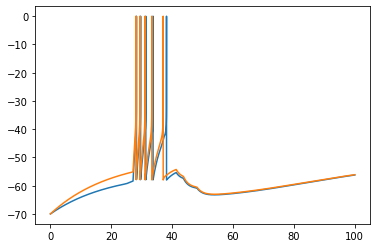

In [570]:
for i in range(2):
    plt.plot(x,cin_voltage_record[i,:],label='dIN')